In [16]:
data_15.index[0] == data_60.index[0]
data_15.index[-1] == data_60.index[-1]

True

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set_style("darkgrid")
%matplotlib inline

def stampToTime(timeStamp):#将时间戳转成字符串
    timeArray = time.localtime(timeStamp)
    otherStyleTime = time.strftime("%Y-%m-%d %H:%M:%S", timeArray)
    return otherStyleTime    
    
def timeToStamp(strTime):#将字符串转成时间戳
    timeArray = time.strptime(strTime, "%Y-%m-%d %H:%M:%S")
    timestamp = time.mktime(timeArray)
    return timestamp

data_15 = pd.read_csv("multasklstm/btc_15min.csv")
data_15.index = data_15.time
data_15 = data_15.drop('time',axis = 1)
data_15 = data_15.iloc[:-3,:]
data_15

data_60 = pd.read_csv("multasklstm/btc_1h.csv")
data_60.index = data_60.time
data_60 = data_60.drop('time',axis = 1)
data_60

,open,high,low,close,volume
time,,,,,
1483228800,966.610000,967.790000,965.000000,967.000000,95.564614
1483232400,967.000000,967.250000,965.500000,965.500000,60.662494
1483236000,965.500000,966.590000,965.000000,965.000000,69.840147
1483239600,965.000000,965.010000,963.160000,964.490000,56.699787
1483243200,963.840000,963.900000,961.260000,962.600000,80.570159
1483246800,962.600000,965.200000,962.110000,964.880000,91.042053
1483250400,964.880000,967.450000,962.720000,967.450000,105.664480
1483254000,966.480000,967.410000,965.800000,965.810000,27.489011
1483257600,965.810000,965.860000,962.600000,965.460000,149.617696


In [2]:
a = data_15.index.tolist()
for i in range(len(data_15)):
    a[i] = stampToTime(data_15.index[i])
data_15.index = a

a = data_60.index.tolist()
for i in range(len(data_60)):
    a[i] = stampToTime(data_60.index[i])
data_60.index = a

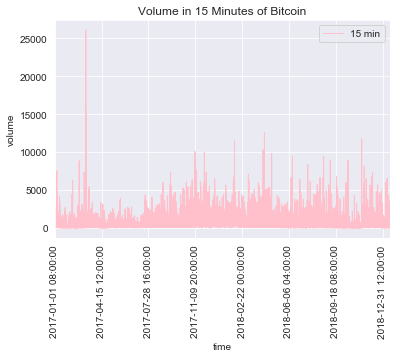

In [3]:
data_15.loc[:,'volume'].plot(label='15 min',color='pink',linewidth=1)
plt.xlabel("time")
plt.ylabel("volume")
plt.title("Volume in 15 Minutes of Bitcoin")
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

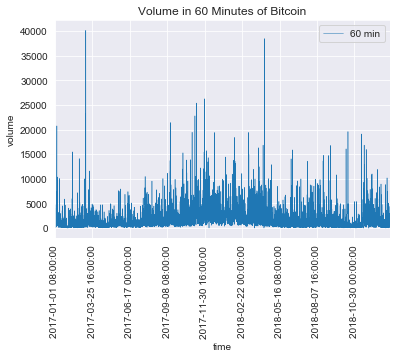

In [4]:
data_60.loc[:,'volume'].plot(label='60 min',linewidth=0.5)
plt.xlabel("time")
plt.ylabel("volume")
plt.title("Volume in 60 Minutes of Bitcoin")
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

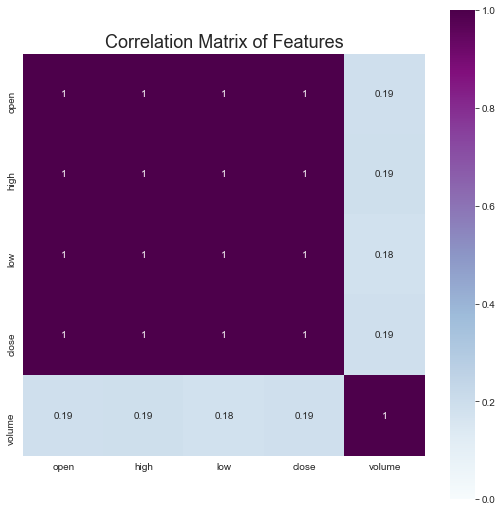

In [5]:

fig, ax = plt.subplots(figsize = (9,9))
#二维的数组的热力图，横轴和数轴的ticklabels要加上去的话，既可以通过将array转换成有column
#和index的DataFrame直接绘图生成，也可以后续再加上去。后面加上去的话，更灵活，包括可设置labels大小方向等。
sns.heatmap(data_15.corr(), annot=True, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap="BuPu")#sns.heatmap(np.round(a,2), annot=True, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, 
#            square=True, cmap="BuRd")
ax.set_title('Correlation Matrix of Features', fontsize = 18)
#ax.set_ylabel('数字', fontsize = 18)
#ax.set_xlabel('字母', fontsize = 18)
plt.show()

In [6]:
data_15.describe().iloc[1:,:]

,open,high,low,close,volume
mean,5708.908123,5728.871532,5688.256190,5708.951836,365.982334
std,3679.264073,3698.905713,3658.589940,3679.252426,559.929151
min,748.350000,760.890000,735.000000,744.480000,0.000000
25%,2567.400000,2575.000000,2559.957969,2567.700000,85.776167
50%,6141.100000,6158.800000,6126.000000,6141.400000,195.861854
75%,7615.000000,7632.100000,7599.500000,7615.000000,421.406740
max,19858.000000,19891.000000,19826.000000,19858.000000,26075.258350


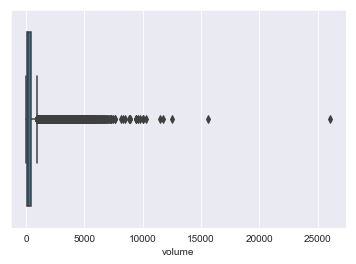

In [7]:
sns.boxplot(data_15.loc[:,'volume'])
plt.show()

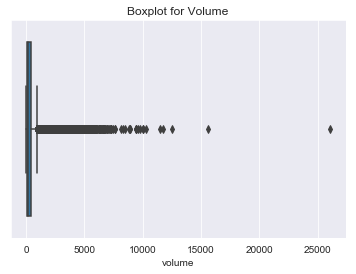

In [8]:
ax = sns.boxplot(data_15.loc[:,'volume'])
plt.title("Boxplot for Volume")
plt.show()

In [9]:
data_15.max()

open      19858.00000
high      19891.00000
low       19826.00000
close     19858.00000
volume    26075.25835
dtype: float64

                             open     high           low         close  \
2017-01-05 21:00:00    976.120000    995.3    888.000000    896.300000   
2017-02-24 15:00:00   1210.600000   1210.6   1110.000000   1150.200000   
2017-03-07 19:30:00   1243.900000   1245.3   1185.000000   1216.900000   
2017-03-10 21:15:00   1205.400000   1339.9   1067.200000   1225.900000   
2017-03-11 05:00:00   1276.500000   1276.5    958.500000   1065.200000   
2017-03-11 05:15:00   1065.900000   1099.0   1020.000000   1063.500000   
2017-09-15 20:15:00   3157.700000   3277.1   3134.837731   3200.000000   
2017-09-15 22:00:00   3393.900000   3585.0   3385.000000   3539.900000   
2017-11-09 01:15:00   7579.800000   7870.0   7565.400000   7850.800000   
2017-11-09 02:30:00   7555.000000   7565.0   6977.400000   7166.700000   
2017-11-12 15:00:00   5645.400000   5999.0   5638.000000   5881.700000   
2017-11-12 15:15:00   5895.000000   6168.7   5835.500000   6050.800000   
2017-11-12 15:45:00   5949.900000   62

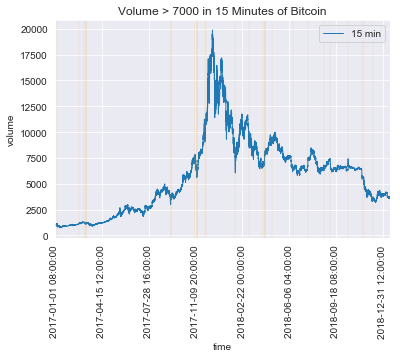

In [32]:
threhold = 7000
a = data_15[data_15.volume >threhold].index
print(data_15[data_15.volume >threhold])
b = []
for i in range(len(data_15.index)):
    if data_15.index[i] in a:
        b.append(i)
data_15.loc[:,'close'].plot(label='15 min',linewidth=1)
plt.xlabel("time")
for i in b:
    #print(i)
    plt.axvline(x=i, color='orange', linewidth=0.1);
plt.ylabel("volume")
plt.title("Volume > "+str(threhold)+" in 15 Minutes of Bitcoin")
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

In [43]:
from statsmodels.tsa import stattools
plt.stem(stattools.acf(data_15.close,True,1000),linewidth=0.1)
#print(stattools.acf(data_15.close,True,1000))

TypeError: stem() got an unexpected keyword argument 'linewidth'

In [75]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 移动平均图
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean()
    # 对size个数据进行加权移动平均
    rol_weighted_mean = pd.ewma(timeSeries, span=size)

    timeSeries.plot(color='blue', label='Original')
    rolmean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):
    #f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

'''
　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# 自相关和偏相关图，默认阶数为31阶
def draw_acf_pacf(ts, lags=31):
    #f = plt.figure(facecolor='white')
    #ax1 = f.add_subplot(211)
    plot_acf(ts, lags=lags)
    plt.title('Autocorrelation of Close Price')
    plt.xlabel("Lags")
    plt.ylabel("Correlation")
    plt.show()
    #ax2 = f.add_subplot(221)
    plot_pacf(ts, lags=lags)
    plt.title('Partial Autocorrelation of Close Price')
    plt.xlabel("Lags")
    plt.ylabel("Correlation")
    plt.show()

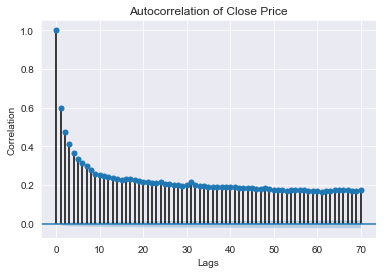

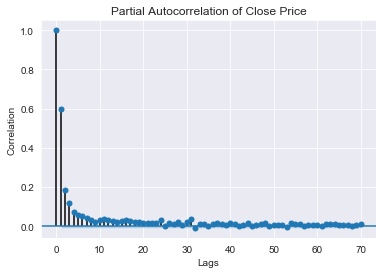

In [77]:
draw_acf_pacf(data_15.volume.iloc[:],70)
#draw_acf_pacf(data_15.close,63)

In [88]:
from arch.unitroot import ADF,KPSS
i = 2
KPSS(data_15.volume.diff(i).iloc[i:])

Test Statistic,0.012
P-value,0.997
Lags,1045


In [ ]:
plt.stem()